<a href="https://colab.research.google.com/github/luuleitner/EMG_tutorial/blob/main/EMG_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install the EMG tutorial GitHub repository.

In [1]:
!pip install git+https://github.com/luuleitner/EMG_tutorial
#if path.exists('/content/EMG_tutorial') == False:
#  !git clone https://github.com/luuleitner/EMG_tutorial

#chdir('/content/EMG_tutorial')


  Cloning https://github.com/luuleitner/EMG_tutorial to /tmp/pip-req-build-ntc1bbqq
  Running command git clone -q https://github.com/luuleitner/EMG_tutorial /tmp/pip-req-build-ntc1bbqq
  Created wheel for EMG-tutorial: filename=EMG_tutorial-1.0-py3-none-any.whl size=6156 sha256=83622d216bc863aa696bebffa22435593786c66449fdf6a020ef99e4df12c8de
  Stored in directory: /tmp/pip-ephem-wheel-cache-sod6e_lk/wheels/66/bf/fb/9a8a1153084cf7ee6d73c9ba2ff6a87a7d835d689a7f5deb5a
Successfully built EMG-tutorial


Next, we load all necessary data and libraries into our Colab notebook. Additionally, we create our project path structure.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from google.colab import files # file handeling on colab
from os import path, mkdir, chdir # directory functions

from emg_processing.filter import Butter
from emg_processing.analyses import rms

We download a EMG sample file. The EMG data was recorded using two differential electrodes on bicpes brachii. The full file contains 2 muscle contractions.

In [3]:
url = 'https://raw.githubusercontent.com/luuleitner/EMG_tutorial/master/bbcontractions.csv'
EMG_data = pd.read_csv(url, sep=',').to_numpy()
EMG_data = np.ravel(EMG_data[:, 0])

`**Assignment starts on this line**`

Please enter the necessary filter parameters.

In [4]:
ARG_SAMPLING_RATE = 1000
ARG_BPF_N = 4
ARG_BPF_LOW = 20
ARG_BPF_HIGH = 320

Use a Butterworth bandpass filter to filter the EMG raw data.

In [5]:
## Filter
EMG_data_filtered = Butter(EMG_data, ARG_BPF_LOW, ARG_BPF_HIGH, ARG_SAMPLING_RATE, order=ARG_BPF_N)

Plot the raw and the filtered EMG data.

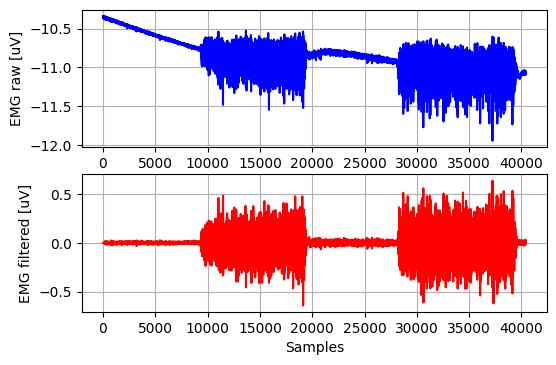

In [6]:
fig = plt.figure(figsize=(6,4), dpi = 100)
ax_1 = fig.add_subplot(211)
ax_1.plot(EMG_data,
          markersize = 1,
          color='blue',
          label = 'x')
ax_1.set_ylabel('EMG raw [uV]')
ax_1.grid()

ax_2 = fig.add_subplot(212)
ax_2.plot(EMG_data_filtered.data_filtered,
          markersize = 1,
          color='red',
          label = 'x')
ax_2.set_ylabel('EMG filtered [uV]')
ax_2.set_xlabel('Samples')
ax_2.grid()

#plt.subplots_adjust(hspace=0.2)
plt.show()

Rectify the EMG data.

In [7]:
## Rectification
EMG_data_filtered.data_filtered_rect = np.abs(EMG_data_filtered.data_filtered)

Plot the rectified EMG signal.

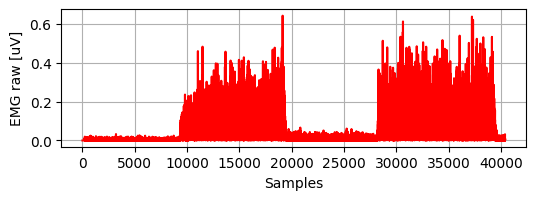

In [8]:
fig = plt.figure(figsize=(6,4), dpi = 100)
ax_1 = fig.add_subplot(211)
ax_1.plot(EMG_data_filtered.data_filtered_rect,
          markersize = 1,
          color='red',
          label = 'x')
ax_1.set_ylabel('EMG raw [uV]')
ax_1.set_xlabel('Samples')
ax_1.grid()

plt.show()

Analyse the EMG signal amplitudes using RMS.

In [14]:
## Root Mean Square
RMS = rms(EMG_data_filtered.data_filtered_rect)
print(f'RMS = {RMS} [uV]')

RMS = 0.09574263911672595 [uV]


Evaluate the power spectral density using Welch's Method

In [19]:
## Welch's Power Spectrum
f, Pxx_den = signal.welch(EMG_data_filtered.data_filtered, ARG_SAMPLING_RATE, nperseg=1024)

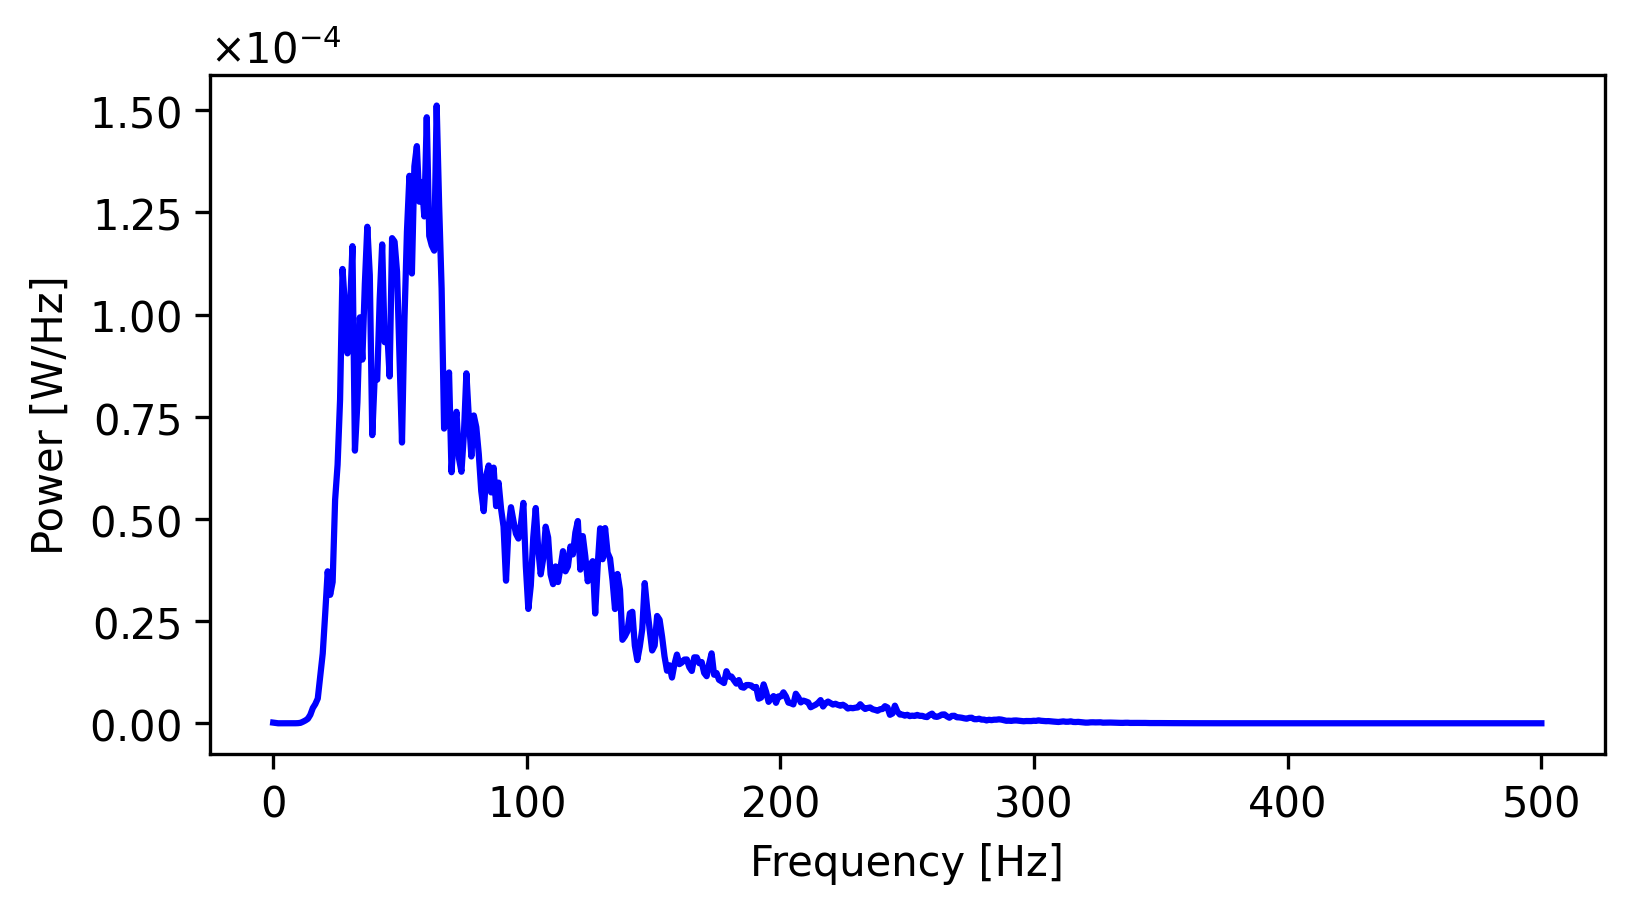

In [20]:
fig1 = plt.figure(figsize=(6,3), dpi = 300)
ax_1 = fig1.add_subplot(111)
ax_1.plot(f, Pxx_den,
          markersize = 1,
          color='blue',
          label = 'x')
ax_1.set_xlabel('Frequency [Hz]')
ax_1.set_ylabel('Power [W/Hz]')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax_1.yaxis.major.formatter._useMathText = True
plt.show()

In [23]:
## Calculate Mean Frequency
P_AOC = np.sum(Pxx_den) 
P_norm = Pxx_den / P_AOC
mnf = np.sum(f.T * P_norm)

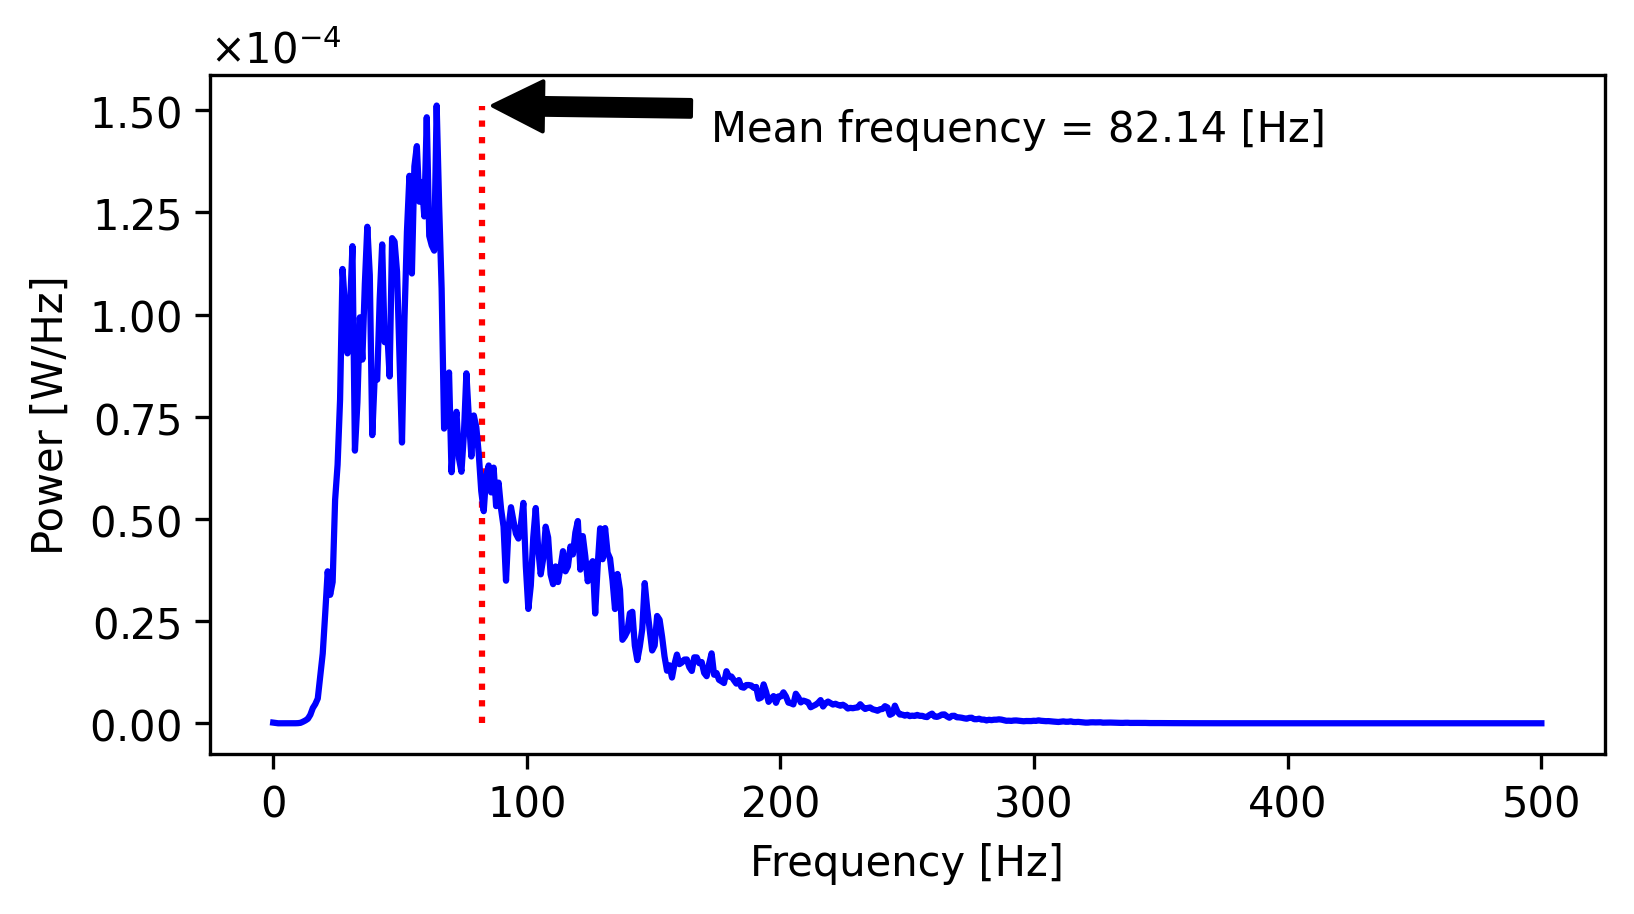

In [29]:
fig1 = plt.figure(figsize=(6,3), dpi = 300)
ax_1 = fig1.add_subplot(111)
ax_1.plot(f, Pxx_den,
          markersize = 1,
          color='blue',
          label = 'x')
ax_1.set_xlabel('Frequency [Hz]')
ax_1.set_ylabel('Power [W/Hz]')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax_1.yaxis.major.formatter._useMathText = True

ax_1.vlines(mnf, 0, np.max(Pxx_den), linestyles ="dotted", colors ="r")
ax_1.annotate(f'Mean frequency = {round(mnf,2)} [Hz]', xy=(mnf, np.max(Pxx_den)),  xycoords='data',
            xytext=(0.8, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
plt.show()